# Scenario 01A: 4 Period with RPS Target

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime as dt

First, we need to import the inputs and outputs folders as path variables, and their contents as file paths, so we can import them in table form as needed.

In [2]:
OUTPUT_PATH = 'outputs/'
OUTPUT_FILES=os.listdir(OUTPUT_PATH)
#OUTPUT_FILES

In [3]:
INPUT_PATH = 'inputs/'
INPUT_FILES= os.listdir(INPUT_PATH)
#INPUT_FILES

This `energy_sources` list will keep track of all the energy sources we expect to see in the outputs. The `energy_colors` list will keep track of the corresponding colors to those sources. The two lists together can be referenced by graphs later.

In [4]:
energy_sources = ['Uranium', 'Water', 'Coal', 'Coal_CCS', 'Gas', 'Gas_CCS', 'Solar', 'Wind']
energy_colors = ["#ff6969", "#6acad9", "#616161", "#a6a6a6", "#58407a", "#9e79d4", "#e8e82a", "#4dbd5e"]

Next, create the tables we want to examine in this notebook.

In [5]:
dispatch = pd.read_csv(OUTPUT_PATH+'dispatch.csv')
dispatch_annual_summary = pd.read_csv(OUTPUT_PATH+'dispatch_annual_summary.csv')
build_gen = pd.read_csv(OUTPUT_PATH+'BuildGen.tab', delimiter='\t')
generation_projects_info = pd.read_csv(INPUT_PATH+'generation_projects_info.tab', delimiter='\t')

## Energy Dispatch by Energy Source
In this section, we plot the amount of energy dispatched in China during each period by energy source. The result is a stacked plot showing both the quantity and proportion of energy generated by each source.

In [6]:
#dispatch_annual_summary

Now we can sort through this table using Pandas.

In [7]:
Regrouped=pd.DataFrame(dispatch_annual_summary.groupby(['period','gen_energy_source'])['Energy_GWh_typical_yr'].sum())
Regrouped2=Regrouped.sort_values(by=['period','gen_energy_source'],ascending=True)
#Regrouped2

In [8]:
#Regrouped2.pivot_table(index='period',columns='gen_energy_source', values='Energy_GWh_typical_yr')

Now see how this looks plotted out.

In [9]:
Regrouped3=Regrouped2.pivot_table(index='period',columns='gen_energy_source', values='Energy_GWh_typical_yr')[energy_sources]
#Regrouped3

Text(0,0.5,'Energy Generation [MWh]')

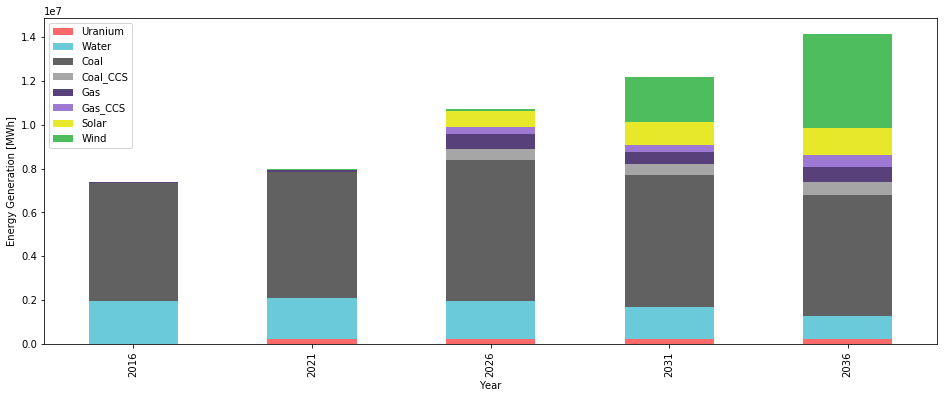

In [10]:
fig,ax = plt.subplots(figsize=(16,6))
Regrouped3.plot(kind='bar',stacked=True, color=energy_colors, ax=ax)
ax.legend(ncol=1)
plt.xlabel('Year')
plt.ylabel('Energy Generation [MWh]')

## Dispatch by Load Zone
This section plots the total energy dispatched per load zone, split into stacks by energy source.

In [11]:
dispatch_zonal = pd.read_csv(OUTPUT_PATH+'dispatch_zonal_annual_summary.csv')

In [12]:
zonal_grouped = pd.DataFrame(dispatch_zonal.groupby(['gen_load_zone', 'period', 'gen_energy_source'])['Energy_GWh_typical_yr'].sum())

In [13]:
zonal_pivot = zonal_grouped.pivot_table(index=['gen_load_zone', 'period'], columns='gen_energy_source', values='Energy_GWh_typical_yr')[energy_sources]
#zonal_pivot

In [14]:
#zonal_pivot.plot(kind='bar', stacked='True', figsize=[16,6], color=energy_colors)
#plt.xlabel("(Load Zone, Investment Period)")
#plt.ylabel("Yearly Dispatched Energy [GWh]")
#plt.legend(ncol=1)

## Total Demand and Dispatch by Timepoint
This section plots the total MW demand and total MW dispatch by energy source of the entire power system for each timepoint modeled. For our toy model here, there are only four days considered so only four days should be plotted.

In [15]:
#dispatch

In [16]:
dispatch_grouped = pd.DataFrame(dispatch.groupby(['timestamp', 'gen_energy_source'])['DispatchGen_MW'].sum())
#dispatch_grouped

In [17]:
dispatch_pivot = dispatch_grouped.pivot_table(index='timestamp', columns='gen_energy_source', values='DispatchGen_MW')
#dispatch_pivot

In [18]:
dispatch_pivot.insert(0, "Graph_Hour", np.arange(len(dispatch_pivot.index)))

In [19]:
dispatch_pivot_reordered = dispatch_pivot[['Graph_Hour', 'Uranium', 'Water', 'Coal', 'Coal_CCS', 'Gas', 'Gas_CCS', 'Solar', 'Wind']]
#dispatch_pivot_reordered

In [20]:
loads = pd.read_csv(INPUT_PATH+'loads.tab', delimiter='\t')
timepoints = pd.read_csv(INPUT_PATH+'timepoints.tab', delimiter='\t')
loads_merged = pd.merge(loads, timepoints,left_on='TIMEPOINT', right_on='timepoint_id')
#loads_merged

In [21]:
loads_grouped = pd.DataFrame(loads_merged.groupby('timestamp')['zone_demand_mw'].sum())
loads_grouped.insert(0, "Graph_Hour", np.arange(len(dispatch_pivot.index)))
#loads_grouped

Text(0,0.5,'Demand [MW]')

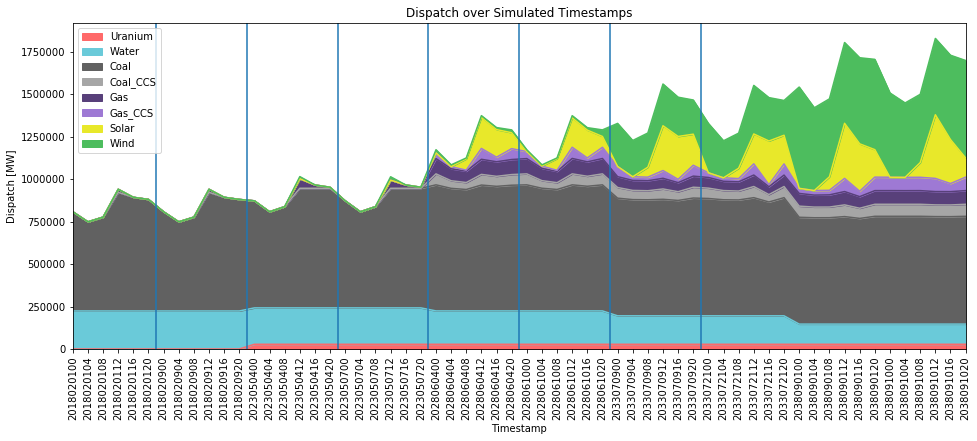

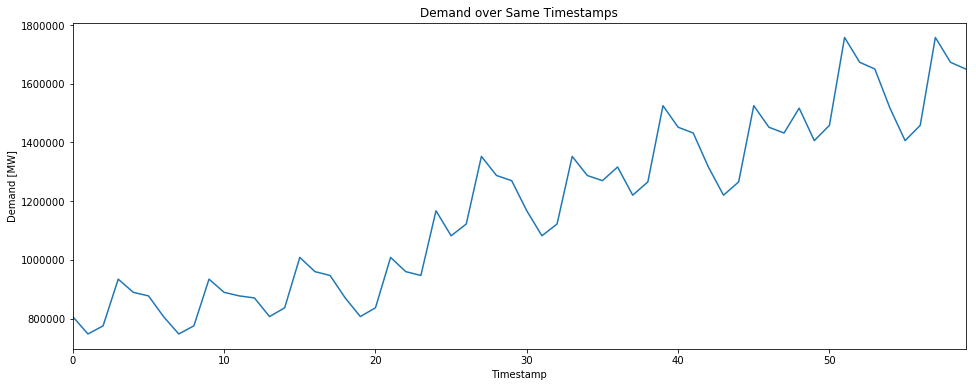

In [22]:
fig, ax1 = plt.subplots(figsize=(16,6))
dispatch_pivot_reordered.plot(x='Graph_Hour', kind='area', stacked='True', figsize=[16,6], color=energy_colors, ax=ax1, title='Dispatch over Simulated Timestamps')
plt.xlabel("Timestamp")
plt.ylabel("Dispatch [MW]")
ax1.xaxis.set_ticks(dispatch_pivot['Graph_Hour'])
ax1.xaxis.set_ticklabels(dispatch_pivot.index)
ax1.xaxis.set_tick_params(rotation=90)
plt.legend(ncol=1)
# Include vertical lines to distinguish dates.
plt.axvline(x=5.5)
plt.axvline(x=11.5)
plt.axvline(x=17.5)
plt.axvline(x=23.5)
plt.axvline(x=29.5)
plt.axvline(x=35.5)
plt.axvline(x=41.5)
loads_grouped.plot(x='Graph_Hour', figsize=[16,6], legend=None, title='Demand over Same Timestamps')
plt.xlabel("Timestamp")
plt.ylabel("Demand [MW]")

It's clear from this graph that the demand profile is the same shape as the dispatch; that is, the dispatch exactly matches the demand in this scenario.

## Installed Capacity by Energy Source
This section plots the amount of power capacity installed each year by energy source. Again, it is a stacked plot so both the amount and proportion of the capacity devoted to each source is visible.

In [23]:
#build_gen

In [24]:
#generation_projects_info

Merge `build_gen` and `generation_projects_info` together by their Generation Plant ID.

In [25]:
buildgen_merged=pd.merge(build_gen,generation_projects_info,left_on='GEN_BLD_YRS_1', right_on='GENERATION_PROJECT')
#buildgen_merged

In [26]:
buildgen_regrouped=pd.DataFrame(buildgen_merged.groupby(['GEN_BLD_YRS_2','gen_energy_source'])['BuildGen'].sum())
buildgen_groupbySorted=buildgen_regrouped.sort_values(by=['GEN_BLD_YRS_2','BuildGen'],ascending=True)
#buildgen_groupbySorted

In [27]:
buildgen_groupbySortedPivot = pd.pivot_table(buildgen_groupbySorted,index='GEN_BLD_YRS_2',columns='gen_energy_source', values='BuildGen', aggfunc='cumsum')[energy_sources]
#buildgen_groupbySortedPivot.fillna(0).cumsum()

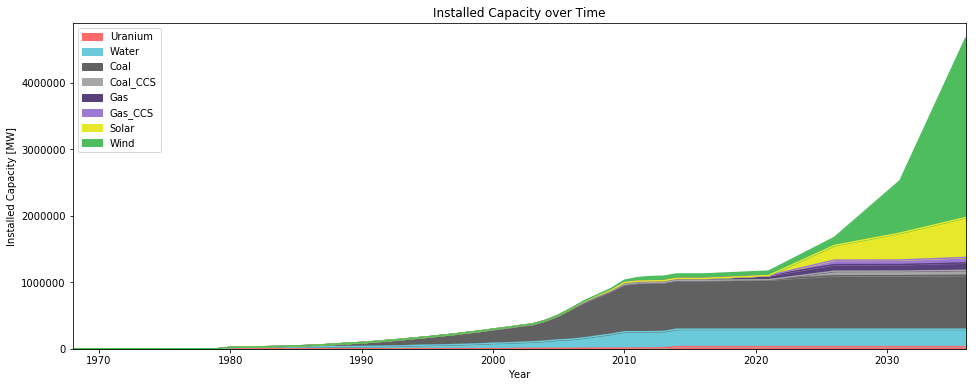

In [28]:
buildgen_groupbySortedPivot.fillna(0).cumsum().plot(kind='area',stacked=True, figsize=[16,6], color=energy_colors, title='Installed Capacity over Time')
plt.xlabel('Year')
plt.ylabel('Installed Capacity [MW]')
plt.legend(ncol=1)

## Renewable Portfolio and Emissions
This section will plot out the RPS and emissions data from the `outputs` directory.

In [29]:
rps = pd.read_csv(OUTPUT_PATH+'rps_energy.txt', delimiter='\t').sort_values(by='PERIOD')
rps.insert(5, 'NonRPSFraction', 1 - rps['RPSGenFraction'])
rps_simple = rps.drop(['RPSFuelEnergyGWh', 'RPSNonFuelEnergyGWh', 'TotalGenerationInPeriodGWh', 'TotalSalesInPeriodGWh', 'RPSSalesFraction'], axis=1)
rps_simple2 = rps_simple.set_index('PERIOD').T
#rps

IOError: [Errno 2] File outputs/rps_energy.txt does not exist: 'outputs/rps_energy.txt'

In [ ]:
ax = rps_simple2.plot(kind='pie', subplots=True, figsize=[16,3.8], legend=None, explode=[0.0, 0.05])

In [ ]:
emissions = pd.read_csv(OUTPUT_PATH+'emissions.txt', delimiter='\t').sort_values(by='PERIOD')
emissions

In [ ]:
ax = emissions.plot(x='PERIOD', y='AnnualEmissions_tCO2_per_yr', legend=None, figsize=[16,6], title='Emissions over Time', color='red')
plt.xlabel('Period')
plt.ylabel('Annual Emissions [tCO2]')
ax.grid(axis='y')